# Simulate, Clean, Plot and Analyze Social Media Data

**Introduction**

In this short project, we explore a simulated social media, e.g. Tweets, dataset to understand trends in _likes_ across different categories.

**Project Scope**

The objective of this project is to analyze tweets (dates, likes, categories) and gain insights into user engagement. A real dataset was not used for this proejct. This means that we first need to realistically simulate a random but reproducible dataset, where it best represents the real-world. This applies to the distribution of the "likes" received per tweet and (to the somewhat realistic) probabilites of different topics (categories) of tweets. We will then explore the dataset using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories.

## Part 1: Required libraries & their purpose

To do the analysis, we'll gather and import the following Python libraries:

* `pandas` for creating the dataframe, grouping and analysis
* `numpy` for forming random reproducible numbers from a range and choosing values from a list with different probabilities
* `Matplotlib.pyplot` for displaying graphs and tweaking the plots
* `seaborn` for plotting the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 2: Generate random but realistic Twitter data

Let's generate some random tweet data to analyze.

We'll use `pandas`' `date_range()` method to choose a pseudo-random date within a range, the `numpy` module’s `choice` to create a choice from a list with varying probabilities, and `numpy`’s `random.lognormal` to create random numbers that are distributed similar to a log-normal distribution (skewed, right long tail, resembling the number of likes social media posts get).

Next, we'll generate a dictionary filled with random data (values) mentioned above, and the following fields (keys):

* `Date`: The date on which the tweet was created
* `Category`: The main subject (category) of the tweet
* `Likes`: The number of likes the tweet has received

The data needs to align, so the _Date_ dictionary-entry should be _n_ periods long, The _Category_ should be a _list_ of random choices _n_ entries long (8 possible choices), and the _Likes_ category should be random integers in the range _0_ to _5000_ (representing number of likes for each single tweet) also with size equal to _n_.

### Number of tweets to analyze
Let's simulate and analyze a gigangtic **1 million tweets** (n = 1000000)!

In [2]:
no_of_tweets = 10**6

### Number & distribution of likes per tweet
**`likes`:** We need to generate random integers between 0 adn 5000 (number of likes) with a heavy skew and long-tail to the right (log-normal).

*Note:* In order to set the "_seed_" of the random generator in `numpy` to a set number so we can reproduce the random integers later, it is best practice to use the `np.random.default_rng(seed)` method. Then we can use the for instance the `.integers(low, high, size)` (or another) method, in case necessary, in order to produce the same exact random numbers in the future when we re-run the code.

In [3]:
# For reproducibility, so that we get the same (random) numbers when running the code later
rng = np.random.default_rng(seed=1234)

# Chosen mean (mu) and standard deviation (sigma) of the (log-normal) distribution
mu, sigma = 15, 0.75 

# Generate a random log-normal distribution:
raw_likes = rng.lognormal(mu, sigma, no_of_tweets) #reproducible np array w/ 1,000,000 random no. w/ log-norm dist.

# Scaling and making sure the values (# of likes received for each tweet (or data row)) is between 0 and 5,000:
scaled_likes = raw_likes / raw_likes.max() * 5000

# Finally rounding the numbers and converting to integers to ensure they are integers within the 0 - 5000 range:
likes = np.round(scaled_likes).astype(int) #likes can't be float

print(f"The length of `likes`: {len(likes)}")
likes

The length of `likes`: 1000000


array([ 43, 149, 248, ...,  99, 208, 124])

### Dates of the tweets
**`date`**: We need 1 million date entries between January 1st and December 31st 2023. To do so, we'll simply use `pandas`' `pd.date_range()` funcion:

In [37]:
date = pd.date_range(start='2023-01-01', end='2023-12-31', periods=no_of_tweets)

### Category of each tweet
**`category`**: We need 1 million random category types (from the `categories` list). For this, we'll set up **different probabilities (`p`) for each of the category** types. The reason is, we do not want to have the same probability across all category types. This is also not the case in a real-world scenario. Since we need a lot of entries, it's best to use a `numpy.random.choice()` array instead of `random.choice()`, that creates a _slow_ `list`.

To define a list of topics for the social media experiment, we'll choose from the following categories:

* _Food_
* _Travel_
* _Fashion_
* _Fitness_
* _Music_
* _Culture_
* _Family_
* _Health_

In [39]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

#we again use the numpy `rng` random variable above that we set a seed for to reproduce the values later too:
category = rng.choice(categories, size=no_of_tweets, p=[0.05, 0.25, 0.15, 0.25, 0.1, 0.025, 0.1, 0.075])  # sum(p) must be 100% !

### Wrapping Twitter data in a dictionary

In [40]:
twitter_data = {'Date': date, 'Category': category, 'Likes': likes}

## Part 3: Loading & exploring the data

In the next step we'll load the randomly generated data into a `pandas`' dataframe (`pd.DataFrame()`). Afterwards we'll explore the the dataframe information (`df.info()`) and the dataframe description (`df.describe()`).

In [7]:
df = pd.DataFrame(data=twitter_data)
df #dataframe with a million rows!

,Date,Category,Likes
0,2023-01-01 00:00:00.000000000,Culture,43
1,2023-01-01 00:00:31.449631449,Family,149
2,2023-01-01 00:01:02.899262899,Music,248
3,2023-01-01 00:01:34.348894348,Fitness,159
4,2023-01-01 00:02:05.798525798,Family,272
...,...,...,...
999995,2023-12-30 23:57:54.201474204,Family,194
999996,2023-12-30 23:58:25.651105652,Music,298
999997,2023-12-30 23:58:57.100737100,Fitness,99
999998,2023-12-30 23:59:28.550368552,Family,208


In [8]:
df.info()
# Everything looks good: no. of rows is 1 million, data types are time, string and integers, and no null values in columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   Date      1000000 non-null  datetime64[ns]
 1   Category  1000000 non-null  object        
 2   Likes     1000000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 22.9+ MB


In [106]:
df.Category.unique()

array(['Culture', 'Family', 'Music', 'Fitness', 'Travel', 'Fashion',
       'Health', 'Food'], dtype=object)

### Descriptive statistics of the dataset

In [9]:
df.describe(include=np.number) #only include numeric columns

,Likes
count,1000000.000000
mean,188.297463
std,162.876118
min,4.000000
25%,86.000000
50%,142.000000
75%,236.000000
max,5000.000000


As seen in the above output (`df.describe()`):
* The tweet with the lowest _likes_ has received only 4, and the one with the highest number of _likes_ has 5000.
* The average number of _likes_ received per Tweet is about 188.
* 25% of the Tweets got 86 or less _likes_
* 50% of the Tweets got 142 or less _likes_
* 75% of the Tweets got 236 or less _likes_

For demonstration purposes (and to make sure the numbers are correct), let's spell out the statistics below:

In [115]:
print(f"The average number of likes per tweet is: {df.Likes.mean().astype('int')}")
print(f"The lowest number of likes for a tweet is: {df.Likes.min()}")
print(f"The highest number of likes for a tweet is: {df.Likes.max()}")
print(f"The percentage of Twitter posts that have more than 86 likes: {len(df[df.Likes > 86]) / len(df) * 100}%")
print(f"The percentage of Twitter posts that have more than 142 likes: {len(df[df.Likes > 142]) / len(df) * 100}%")
print(f"The percentage of Twitter posts that have more than 236 likes: {len(df[df.Likes > 236]) / len(df) * 100}%")

The average number of likes per tweet is: 188
The lowest number of likes for a tweet is: 4
The highest number of likes for a tweet is: 5000
The percentage of Twitter posts that have more than 86 likes: 74.5895%
The percentage of Twitter posts that have more than 142 likes: 49.8255%
The percentage of Twitter posts that have more than 236 likes: 24.8674%


However, the mode and the median are the dataset (for `Likes`) is missing.

* _Mode_: The value appear most often within a dataset.
* _Median_: The value in the _middle_ of the dataset. It means that 50% of the values are larger (or equal) and 50% are smaller (or equal) compared to the median.

In [117]:
df.mode(numeric_only=True)

,Likes
0,84


In [121]:
df.Likes.median()

142.0

Therefore:
* The most common number of likes for a tweet was **84**.
* The median number of likes is **142**. Which means half the tweets got less than 142 likes, and the other half received more than 142 likes for the post.

In [158]:
# Evaluating the "mode": 84 likes is indeed the most common "count" for tweets, followed by 86, 75, ...!
df.groupby('Likes').count().sort_values('Date', ascending=False).head()

,Date,Category
Likes,,
84,5031,5031
86,5022,5022
75,5014,5014
93,4989,4989
87,4983,4983


In [177]:
# Evaluating the "mean": 142 is the middle number of likes.
print(f"Number of tweets that received 142 or more likes: {len(df[df.Likes >= 142])}")
print(f"Number of tweets that received less than 142 likes: {len(df[df.Likes < 142])}")
print(f"Sum of tweets mentioned above: {len(df[df.Likes >= 142]) + len(df[df.Likes < 142])}")

Number of tweets that received 142 or more likes: 502071
Number of tweets that received less than 142 likes: 497929
Sum of tweets mentioned above: 1000000


## Part 4: Cleaning the data

As we saw above (using the `df.info()` method), there were no null values and since this dataset was simulated artificially, no gaps or certain amount of celaning is necessary. However, this is not the case in the real world, as data is never clean.

The only thing in this case we can improve, is to appropriately display the date information, we'll normalize the date column to a datetime format using the `pd.to_datetime().dt.normalize()` method in order to remove the redundant "time" values in the `Date`column, while keeping the `datetime` data type intact! 

In [179]:
#we use normalize to remove the time portion AND keep Dtype as datetime!
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()

print('Data type for the Date column is unchanged:', df.Date.dtype) #
df#.head()

Data type for the Date column is unchanged: datetime64[ns]


,Date,Category,Likes
0,2023-01-01,Culture,43
1,2023-01-01,Family,149
2,2023-01-01,Music,248
3,2023-01-01,Fitness,159
4,2023-01-01,Family,272
...,...,...,...
999995,2023-12-30,Family,194
999996,2023-12-30,Music,298
999997,2023-12-30,Fitness,99
999998,2023-12-30,Family,208


## Part 5: Visualizing & analyzing the data

Let's visualize the data using the `seaborn` module in a histogram plot of the _Likes_. This is done using the `sns.histplot()` function, passing in the `df` field _Likes_ (`df['Likes']`).

Afterwards, let's create a boxplot with the _x_ axis as _Category_, and the _y_ axis as _Likes_.

We'll then go ahead and perform some simple statistics on the data. First, we'll investiage the _mean_ of the _Likes_ catregory. Next, we'll use the `df.groupby()` method to print out the mean of each Category _Likes_.

<Axes: title={'center': 'Histogram of frequency of number of likes received for 1 million tweets'}, xlabel='Number of likes per tweet', ylabel='Frequency (number) of tweets with the given number of likes in 2023'>

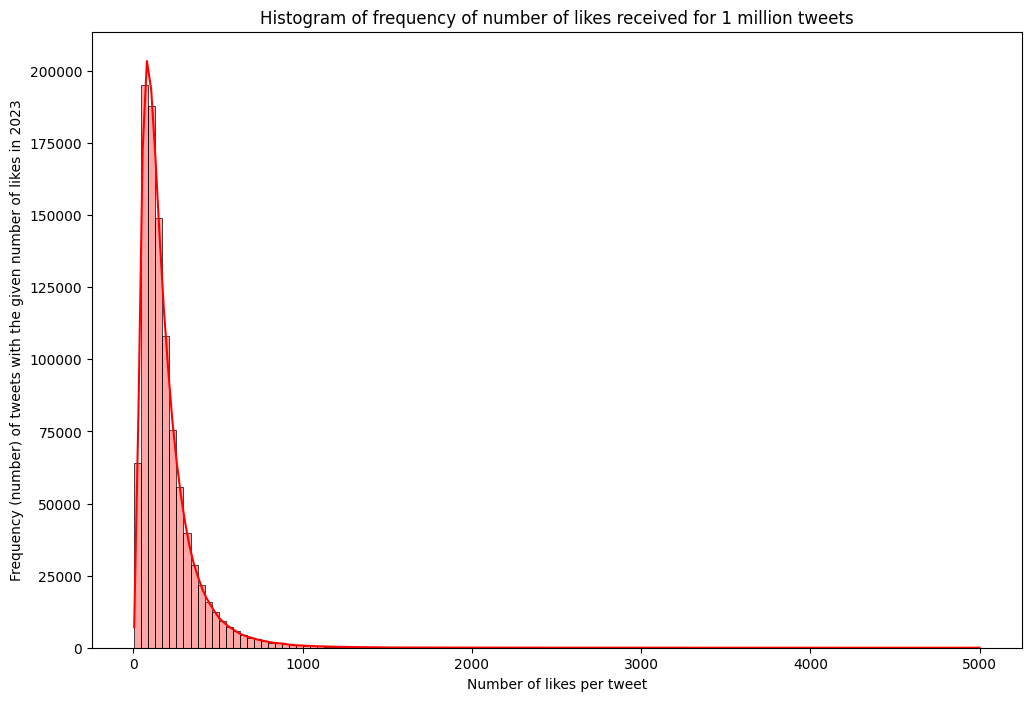

In [198]:
plt.figure(figsize=(12,8))
plt.title('Histogram of frequency of number of likes received for 1 million tweets')
plt.xlabel('Number of likes per tweet')
plt.ylabel('Frequency (number) of tweets with the given number of likes in 2023')

sns.histplot(data=df.Likes, kde=True, bins=120, color='red', alpha=0.35)

We can clearly see above, the log-normal heavily skewed distribution (we generated the data this way), since on social media, most posts/tweets get only a handful of likes, while very few go viral. We saw before, that the most common number of likes was *84* which is proven by the histogram (the sharpest peak is around the 100 likes area).

<Axes: title={'center': 'Likes each tweet received oer category'}, xlabel='Category', ylabel='Number of likes per tweet'>

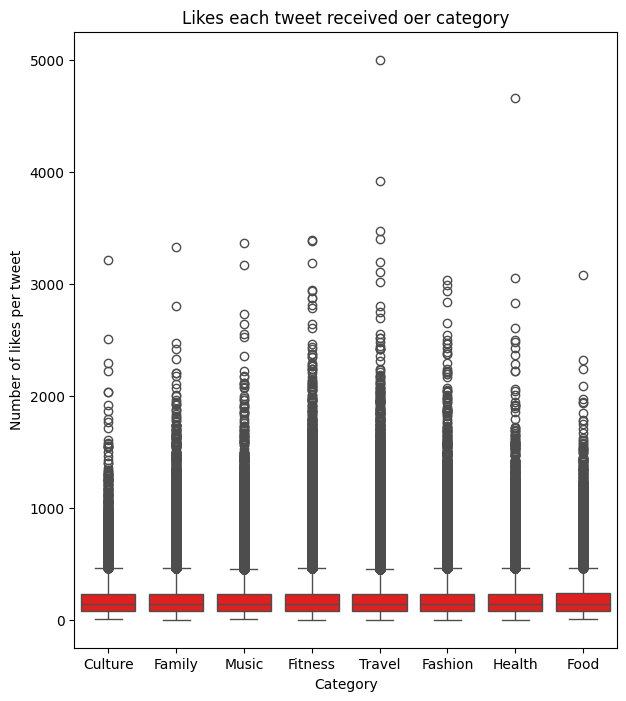

In [184]:
# Plot number of likes per tweet per each category:

plt.figure(figsize=(7, 8))
plt.title('Likes each tweet received oer category')
plt.ylabel('Number of likes per tweet')

sns.boxplot(x=df.Category, y=df.Likes, color='red')

We can see below in the boxplot, that the number of likes per tweet is more or less similar across all categories. The _Travel_ category has higher number of outliers that are away from the mean and the only category with a tweet of 5000 likes.

* Highest number of likes for a tweet was **5000**, posted on 30th of April, 2023 with the _Travel_ topic.
* Lowest number of likes for a tweet was **4**, that was tweeted on Aug. 5, 2023 from the _Fitness_ category.

In [187]:
display(df[df.Likes == max(df.Likes)])
display(df[df.Likes == min(df.Likes)])

,Date,Category,Likes
326968,2023-04-30,Travel,5000


,Date,Category,Likes
593675,2023-08-05,Fitness,4


Average number of likes per tweet is similar across all categories:

In [189]:
# Average number of likes received per tweet in each category:
ave_likes_by_cat = df[['Likes','Category']].groupby('Category').mean()
ave_likes_by_cat = ave_likes_by_cat.astype('int32').sort_values(by='Likes', ascending=False) #round the means
ave_likes_by_cat.rename(columns={'Likes': 'Average no. of likes/tweet'}, inplace=True) #rename the column label

ave_likes_by_cat

,Average no. of likes/tweet
Category,
Food,189
Family,188
Fashion,188
Fitness,188
Health,188
Culture,187
Music,187
Travel,187


Number of tweets posted is also the same throughout the year (in each month):

In [190]:
# Number of tweets per month
no_tweet_by_mont = df[['Likes']].groupby(df['Date'].dt.month).count()

no_tweet_by_mont.rename(columns={'Likes': 'No. of tweets/month'}, inplace=True) #renaming the column name
no_tweet_by_mont.rename_axis('Month', inplace=True) #renaming the name of the "group-by" column (Date) which is now the index

no_tweet_by_mont.T

Month,1,2,3,4,5,6,7,8,9,10,11,12
No. of tweets/month,85165,76923,85165,82417,85165,82418,85164,85165,82418,85164,82418,82418


However, there are huge discrepancies across the number of tweets for each category:

In [191]:
# Number of tweets per category
no_tweet_by_cat = df.groupby('Category')[['Likes']].count()

no_tweet_by_cat.sort_values(by='Likes', ascending=False, inplace=True)
no_tweet_by_cat.rename(columns={'Likes': 'No. of tweets/category'}, inplace=True)
no_tweet_by_cat.reset_index(inplace=True)

no_tweet_by_cat

,Category,No. of tweets/category
0,Travel,249694
1,Fitness,249426
2,Fashion,150021
3,Family,100715
4,Music,99879
5,Health,75290
6,Food,50037
7,Culture,24938


We can plot this discrepancy below:

[<BarContainer object of 8 artists>]


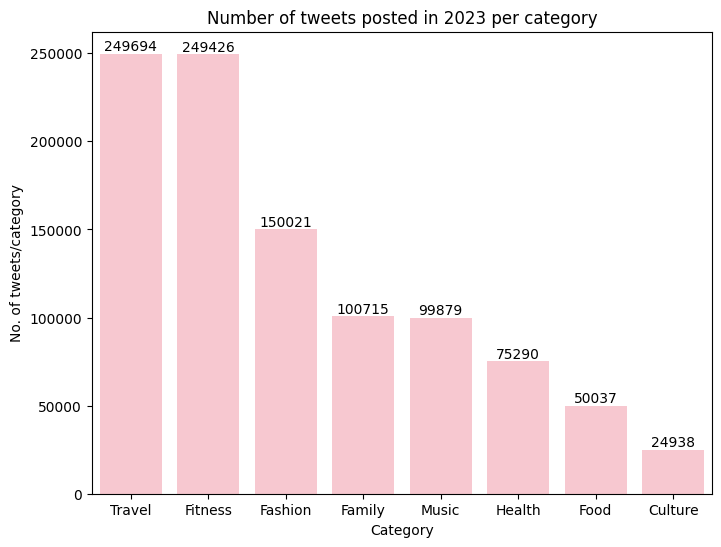

In [199]:
plt.figure(figsize=(8,6))
plt.title('Number of tweets posted in 2023 per category')

ax = sns.barplot(data=no_tweet_by_cat,
                 x='Category',
                 y='No. of tweets/category',
                 color='pink')

# Reminder: The following line is for demonstration purposes that shows a list that contains 8 "artists" (in our case 8 different type of Category). Under the hood, Matplotlib creates a BarContainer object that contains all the bars (represented as 8 Rectangle objects) of the plot. This container is then added to the ax.containers list:
print(ax.containers)

# This lines adds the y-axis values on top of each bar. It uses the bar objects from the `containers` mentioned above
ax.bar_label(ax.containers[0])

plt.show()

## Discussion

* **Challenges:**
    * As discussed earlier, the challenge in this particular project, is to accurately mimic the distribution of likes in the real world, hence the long-normal distribution used.
    * Another simulated field was the distribution of categories. Despite the fact that one might _guess_ which topics are most commonly discussed on Twitter (X), it is not possible to know, unless extracting data for at least a few years using the Twitter API.
* **Potential Improvements and Methods:**
     * Considering that the dataset was generated and not mined from the real world, another challenge comes to mind: How do we _categorize_ a million tweets? It is obviously not at all feasible for humans to go through the whole dataset one by one and decide what the topic of the social media post is. The way to do so programatically is called the Sentiment Analysis (to understand the positivity of the tweet), as well as Labeling/Categorization. These can be achieved by the following methods:
    * Using Machine Learning and _train_ the model to distinguish between positive and negative sentiments, and to infer the topic of the given text based on supervised learning and natural language processing.
    * Using a Large Language Model (LLM) such as GPT via OpenAI's API to feed the data (tweets) and infer the topic (or sentiment).
 
Each of the approaches above have their own disadvantages:
   * Training a new model from scratch requires advanced programming and statistics skills, can be unreliable and requires human labeling and the data size for training is limited.
   * Using an existing and well-known LLM is much more easier to set up and more reliable (trained on massive data). However, feeding millions (or thousands) of lines of text means a gigantic number of tokens. Since the service is not free and the costs are calculated per token, this can very quickly rack up costs and eat through the budgetm before the data analysis on a single dataset is through.

With challenges, possible solutions to the real-world data, as well as description to the approaches used in this project, I hope that others are inspired and go on about working on ambitious projects.